In [1]:
import torch
from torch import nn

import pandas as pd
import numpy as np

import torchvision
from torchvision import transforms, models

In [2]:
df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test_df = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
test_df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
y = df['label']
y = y.values.tolist()
y[0:10], type(y), type(y[0])

([1, 0, 1, 4, 0, 0, 7, 3, 5, 3], list, int)

In [5]:
X = df.drop(['label'], axis=1)
X

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
X = X.to_numpy()

In [7]:
X.shape, X.dtype

((42000, 784), dtype('int64'))

In [8]:
transform = transforms.Compose([
    transforms.ToTensor()
])

In [9]:
X.astype('uint8')

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [10]:
from torch.utils.data import Dataset

class DigitDataset(Dataset):
    def __init__(self, X, y, transform):
        self.X = X.astype('uint8')
        self.X = self.X.reshape((42000, 28, 28))
        self.X = transform(self.X).permute((1,2,0))
        self.X = self.X.unsqueeze(dim=1)
        self.y = y
        
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]
    
    def __len__(self):
        return len(self.y)

In [11]:
data = DigitDataset(X, y, transform)
data

Text(0.5, 1.0, '7')

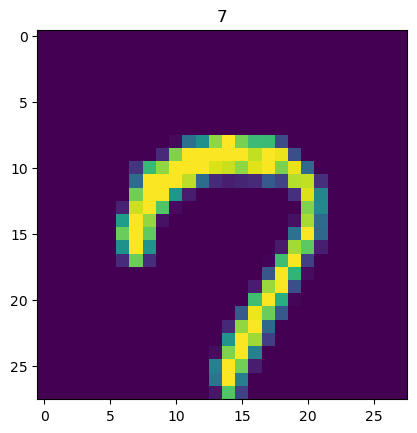

In [12]:
import matplotlib.pyplot as plt

idx = 34598
plt.imshow(data[idx][0].squeeze())
plt.title(data[idx][1])

In [13]:
data[0][0].shape

torch.Size([1, 28, 28])

In [14]:
from torch.utils.data import DataLoader, random_split

train_data, test_data = random_split(data, [35000, 7000])
len(train_data), len(test_data)

(35000, 7000)

In [15]:
BATCH_SIZE = 50

train_dataloader = DataLoader(train_data, BATCH_SIZE, True)
test_dataloader = DataLoader(test_data, BATCH_SIZE, True)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7ea79ad2ea50>,
 <torch.utils.data.dataloader.DataLoader at 0x7ea79ad2ea90>)

In [16]:
print(f"Train: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Test: {len(test_dataloader)} batches of {BATCH_SIZE}")

Train: 700 batches of 50
Test: 140 batches of 50


In [17]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [18]:
def train_loop(model, dataloader, loss_fn, optimizer, accuracy_fn, device):
    train_loss = 0
    train_acc = 0
    model.to(device)
    model.train()
    
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        
        y_preds = model(X)
        loss = loss_fn(y_preds, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y, y_pred=y_preds.argmax(dim=1))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    train_loss /= len(dataloader)
    train_acc /= len(dataloader)
    
    print(f"Train loss: {train_loss: .5f} | Train accuracy: {train_acc: .5f}%")

In [19]:
def test_loop(model, dataloader, loss_fn, accuracy, device):
    test_loss = 0
    test_acc = 0
    model.to(device)
    model.eval()
    
    with torch.inference_mode():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            test_preds = model(X)
            test_loss += loss_fn(test_preds, y)
            test_acc += accuracy_fn(y_true=y, y_pred=test_preds.argmax(dim=1))
        
        test_loss /= len(dataloader)
        test_acc /= len(dataloader)
        print(f"Test loss: {test_loss: .5f} | Test accuracy: {test_acc: .5f}")
        
        return test_acc

In [20]:
import requests
from pathlib import Path

# so we dumb, we using helper functions
# we can ALSO just use torchmetrics functions for accuracy
# download helper functions from Learn PyTorch repo
if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists, skipping download")
else:
    print("Downloading helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", 'wb') as f:
        f.write(request.content)

In [21]:
class TinyVGG(nn.Module):
    def __init__(self, input_shape, hidden_units, output_shape):
        super().__init__()
        self.conv_layer_1 = nn.Sequential(
            nn.Conv2d(input_shape, hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=1),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.BatchNorm2d(hidden_units),
            nn.Conv2d(hidden_units, hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=1),
            nn.MaxPool2d(2)
        )
        
        self.conv_layer_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=1),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.BatchNorm2d(hidden_units),
            nn.Conv2d(hidden_units, hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=1),
            nn.MaxPool2d(2)
        )
        
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Dropout(0.4),
            nn.Linear(hidden_units*7*7, output_shape)
        )
        
    def forward(self, X):
        X = self.conv_layer_1(X)
        #print(X.shape)
        X = self.conv_layer_2(X)
        #print(X.shape)
        return self.classifier(X)

In [22]:
model = TinyVGG(1, 15, 10)
model

TinyVGG(
  (conv_layer_1): Sequential(
    (0): Conv2d(1, 15, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Dropout(p=0.1, inplace=False)
    (3): BatchNorm2d(15, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): Conv2d(15, 15, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_layer_2): Sequential(
    (0): Conv2d(15, 15, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Dropout(p=0.1, inplace=False)
    (3): BatchNorm2d(15, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): Conv2d(15, 15, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Dropout(p=0.4, inplace=False)
    (2): Linear(in_features=735, out_features=10, bias=True

In [23]:
test = torch.rand(1,1,28,28)
model(test)

tensor([[ 0.2134,  0.1905,  0.2875,  0.3779,  0.2557,  0.3254,  0.6826, -0.8042,
          0.4017, -0.5045]], grad_fn=<AddmmBackward0>)

In [24]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(),
                            lr=0.001)

In [25]:
from tqdm.auto import tqdm

epochs = 10
max_test_acc = 0

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n----------")
    train_loop(model, train_dataloader, loss_fn, optimizer, accuracy_fn, device)
    test_acc = test_loop(model, test_dataloader, loss_fn, accuracy_fn, device)
    if test_acc > max_test_acc:
        max_test_acc = test_acc
        best_state_dict = model.state_dict()

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0
----------
Train loss:  0.27431 | Train accuracy:  91.36286%
Test loss:  0.11453 | Test accuracy:  96.41429
Epoch: 1
----------
Train loss:  0.09119 | Train accuracy:  97.12286%
Test loss:  0.06582 | Test accuracy:  97.92857
Epoch: 2
----------
Train loss:  0.07553 | Train accuracy:  97.56000%
Test loss:  0.06022 | Test accuracy:  98.14286
Epoch: 3
----------
Train loss:  0.06686 | Train accuracy:  97.90857%
Test loss:  0.06260 | Test accuracy:  98.05714
Epoch: 4
----------
Train loss:  0.05712 | Train accuracy:  98.17714%
Test loss:  0.06428 | Test accuracy:  98.07143
Epoch: 5
----------
Train loss:  0.05396 | Train accuracy:  98.24000%
Test loss:  0.05102 | Test accuracy:  98.41429
Epoch: 6
----------
Train loss:  0.05164 | Train accuracy:  98.36857%
Test loss:  0.05047 | Test accuracy:  98.50000
Epoch: 7
----------
Train loss:  0.04995 | Train accuracy:  98.40857%
Test loss:  0.05661 | Test accuracy:  98.25714
Epoch: 8
----------
Train loss:  0.04744 | Train accuracy:  98.4

In [26]:
best_model = TinyVGG(1, 15, 10)
best_model.load_state_dict(best_state_dict)

<All keys matched successfully>

## Working on test data

In [27]:
X = test_df.to_numpy()
X = X.astype('uint8')
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [28]:
X = X.reshape((28000, 28, 28))
X = transform(X)
X = X.permute(1, 2, 0)


In [29]:
X = X.unsqueeze(dim=1)
X.shape

torch.Size([28000, 1, 28, 28])

Text(0.5, 1.0, 'test')

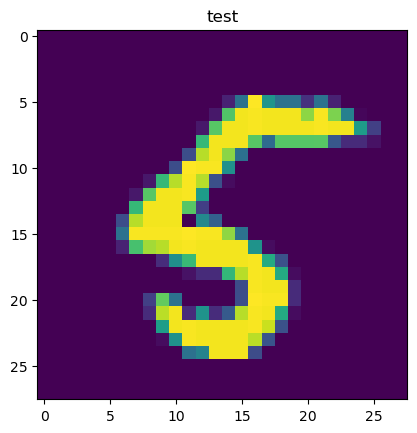

In [30]:
idx = 1233

plt.imshow(X[idx].squeeze())
plt.title('test')

In [31]:
final_model = nn.Sequential(
    best_model,
    nn.Softmax(dim=1)
)

In [32]:
final_model.eval()
with torch.inference_mode():
    final_model.to(device)
    out = final_model(X[idx].unsqueeze(dim=0).to(device)).argmax(dim=1).item()

In [33]:
l = [i for i in range(1,28001)]
l[27990:]

[27991, 27992, 27993, 27994, 27995, 27996, 27997, 27998, 27999, 28000]

In [34]:
dic = {'ImageId': l, 'Label': out}

In [35]:
out_df = pd.DataFrame(dic)
out_df

,ImageId,Label
0,1,5
1,2,5
2,3,5
3,4,5
4,5,5
...,...,...
27995,27996,5
27996,27997,5
27997,27998,5
27998,27999,5


In [36]:
out_df.to_csv('final_digit_recognizer_submission.csv', index=False)